In [65]:
# Carregamento e Tratamento de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento, Modelagem e Avaliação
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [66]:
# Adicionando os nomes das colunas

columns_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
    'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

df = pd.read_csv('data/spambase.data', names=columns_names)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [68]:
df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [69]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


array([[<Axes: title={'center': 'word_freq_make'}>,
        <Axes: title={'center': 'word_freq_address'}>,
        <Axes: title={'center': 'word_freq_all'}>,
        <Axes: title={'center': 'word_freq_3d'}>,
        <Axes: title={'center': 'word_freq_our'}>,
        <Axes: title={'center': 'word_freq_over'}>,
        <Axes: title={'center': 'word_freq_remove'}>,
        <Axes: title={'center': 'word_freq_internet'}>],
       [<Axes: title={'center': 'word_freq_order'}>,
        <Axes: title={'center': 'word_freq_mail'}>,
        <Axes: title={'center': 'word_freq_receive'}>,
        <Axes: title={'center': 'word_freq_will'}>,
        <Axes: title={'center': 'word_freq_people'}>,
        <Axes: title={'center': 'word_freq_report'}>,
        <Axes: title={'center': 'word_freq_addresses'}>,
        <Axes: title={'center': 'word_freq_free'}>],
       [<Axes: title={'center': 'word_freq_business'}>,
        <Axes: title={'center': 'word_freq_email'}>,
        <Axes: title={'center': 'word_f

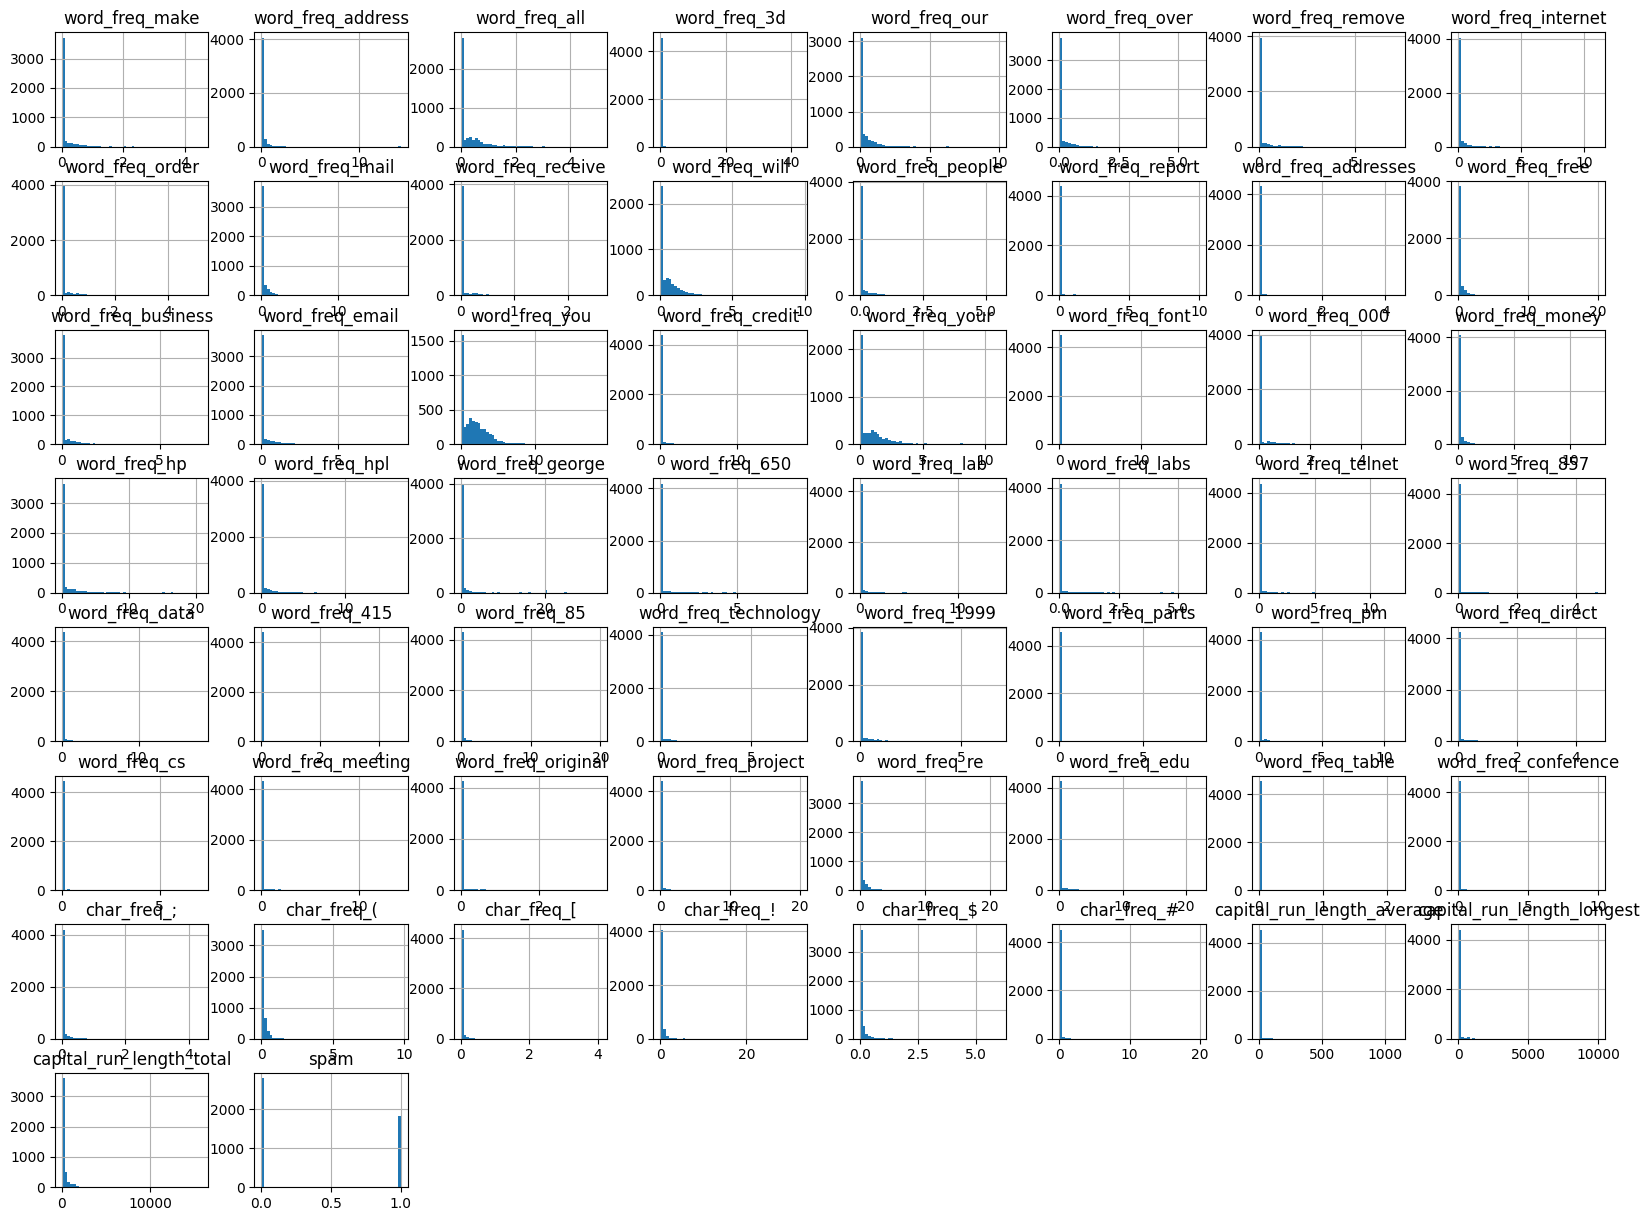

In [70]:
df.hist(bins=50, figsize=(20, 15))

In [71]:
# Separando a variável alvo das variáveis independentes
X = df.drop('spam', axis=1)
Y = df['spam']

In [72]:
# Dividindo os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# criando um campo de busca para armazenar os valores de K para encontrar o melhor valor avaliando pela acurácia
k_values = list(range(1, 50))
accuracy_values = []

# Loop com validação cruzada de 10 folds para encontrar o melhor valor de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    accuracy_values.append(scores.mean())

best_k = k_values[accuracy_values.index(max(accuracy_values))]
print(f'Melhor valor de K: {best_k}')

Melhor valor de K: 9


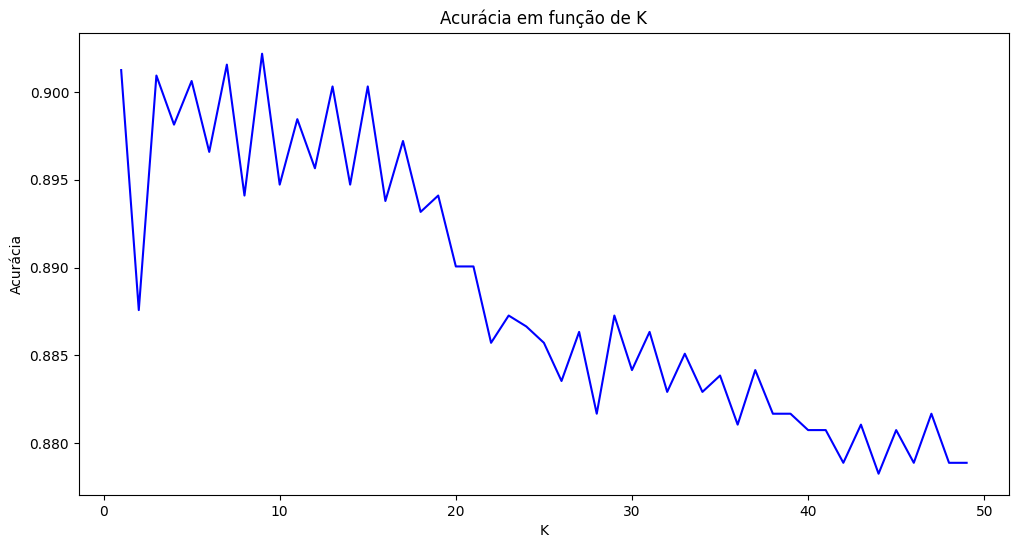

In [74]:
# Plotando o gráfico de acurácia em função de K
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_values, color='blue')
plt.title('Acurácia em função de K')
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.show()

In [75]:
# Treinando o modelo com o melhor valor de K e avaliando as métricas de precision, recall e f1-score
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_pred = knn_best.predict(X_test)

print(f'Acurácia: {accuracy_score(Y_test, Y_pred) :.4f}')
print(f'Precision: {precision_score(Y_test, Y_pred) :.4f}')
print(f'Recall: {recall_score(Y_test, Y_pred) :.4f}')
print(f'F1-Score: {f1_score(Y_test, Y_pred) :.4f}')

Acurácia: 0.9117
Precision: 0.9268
Recall: 0.8562
F1-Score: 0.8901


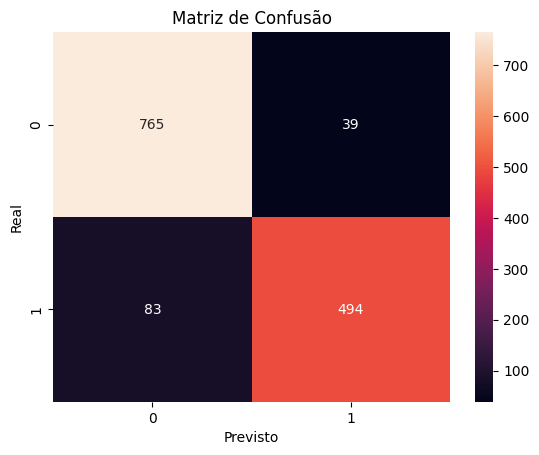

In [76]:
# Matriz de confusão
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()